In [16]:
import torch
from torch import nn

import torchvision
import sklearn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [18]:
#make 10000 samples
n_samples = 10000

In [19]:
#make circles,keep random state so get same values
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [20]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")


First 5 X features:
[[ 0.0464692   0.82477834]
 [ 1.00506323 -0.43335153]
 [-0.58348442  0.79452834]
 [ 0.98478298 -0.32517879]
 [ 0.82993028 -0.54722305]]

First 5 y labels:
[1 0 0 0 0]


In [21]:
#Make DF of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)


,X1,X2,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
5,-0.133929,0.776249,1
6,0.779197,0.645811,0
7,0.722955,0.173831,1
8,-0.121807,0.796951,1
9,0.849529,0.505678,0


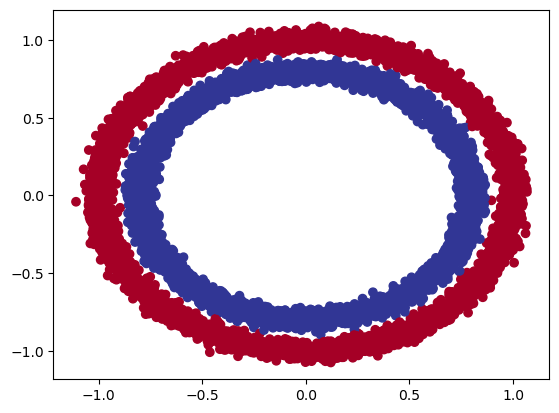

In [22]:
# Visualize with color map red yellow blue
plt.scatter(x=X[:,0],
           y=X[:,1],
            c=y,
cmap=plt.cm.RdYlBu);

In [23]:
X.shape,y.shape

((10000, 2), (10000,))

In [24]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.0464692  0.82477834] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [25]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.0465,  0.8248],
         [ 1.0051, -0.4334],
         [-0.5835,  0.7945],
         [ 0.9848, -0.3252],
         [ 0.8299, -0.5472]]),
 tensor([1., 0., 0., 0., 0.]))

In [27]:
#80% training,20% testing
#800 training samples and 200 testing samples
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2,
                                              random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(8000, 2000, 8000, 2000)

## Building Model

In [28]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [31]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 neural network capable of handling X and y input and output
        self.layer_1=nn.Linear(in_features=2,out_features=5)#takes in 2 features (X),produces 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1)#takes in 5 features, produces 1 feature(y)
    
    #Define 1 forward method containing the forward pass computation
    def forward(self,x):
        #Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Having 5 neurons => layer turns input data from having 2 features to 5

In [32]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 2000, Shape: torch.Size([2000, 1])
Length of test samples: 2000, Shape: torch.Size([2000])

First 10 predictions:
tensor([[-0.3291],
        [-0.0443],
        [-0.1879],
        [-0.4065],
        [-0.4877],
        [-0.2155],
        [-0.2888],
        [-0.2725],
        [-0.3595],
        [-0.5813]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.])


In [35]:
# Create a loss function (how wrong model prediction are)
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [36]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4669, -0.3428],
                      [ 0.2053,  0.5314],
                      [-0.3193,  0.4271],
                      [ 0.2621,  0.4972],
                      [-0.3695,  0.7068]])),
             ('layer_1.bias',
              tensor([-0.4359,  0.5233,  0.5956,  0.5554, -0.2586])),
             ('layer_2.weight',
              tensor([[ 0.3175, -0.0562, -0.3753, -0.1063,  0.0028]])),
             ('layer_2.bias', tensor([0.1571]))])

In [37]:
#calculate accurasy
def accurasy_fn(y_true,y_red):
    correct-torch.eq(y+true,y_pred.sum().item())
    acc=(correct/len(y_pred))*100
    return acc